Name: Mihir Unmesh Patil

Roll No: TYCOC213

Batch: C/ C-3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set_theme()

In [2]:
hours = np.array([10, 9, 2, 15, 10, 16, 11, 16])
risk = np.array([95, 80, 10, 50, 45, 98, 38, 93])

X = hours.reshape(-1, 1)
y = risk.reshape(-1, 1)

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X, y)

# Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
Y_pred_poly = poly_reg.predict(X_poly)
poly_r2 = r2_score(y, Y_pred_poly)

# Generate points for smooth curve plotting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_linear = model_linear.predict(X_range)
y_poly = poly_reg.predict(PolynomialFeatures(degree=3).fit_transform(X_range))

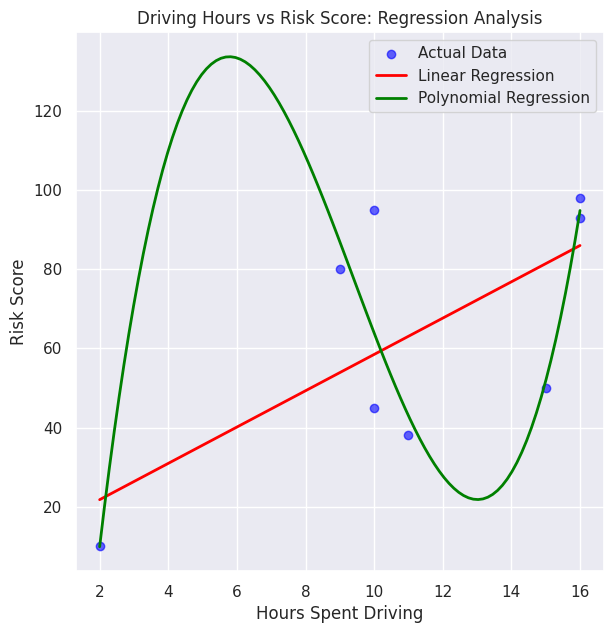

In [5]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_range, y_linear, color='red', label='Linear Regression', linewidth=2)
plt.plot(X_range, y_poly, color='green', label='Polynomial Regression', linewidth=2)
plt.xlabel('Hours Spent Driving')
plt.ylabel('Risk Score')
plt.title('Driving Hours vs Risk Score: Regression Analysis')
plt.legend()
linear_r2 = r2_score(y, model_linear.predict(X))
poly_r2 = r2_score(y, poly_reg.predict(X_poly))

metrics_part1 = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'R2 Score': [linear_r2, poly_r2]
})

In [6]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5)
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'R2': r2
    }

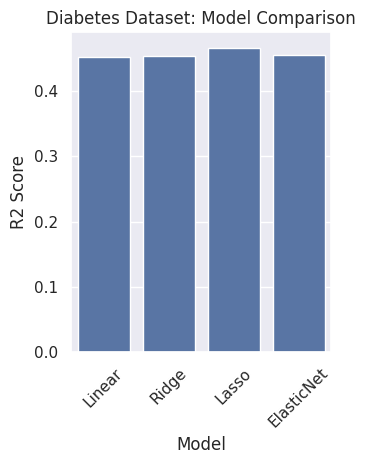

In [8]:
results_df = pd.DataFrame(results).T

# Plotting Part 2 Results
plt.subplot(1, 2, 2)
sns.barplot(data=results_df.reset_index(), x='index', y='R2')
plt.title('Diabetes Dataset: Model Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
print("\nPart 1: Driving Hours vs Risk Score Analysis")
print("=" * 50)
print(metrics_part1.to_string(index=False))

print("\nPart 2: Diabetes Dataset Analysis")
print("=" * 50)
print("Model Performance Metrics:")
print(results_df.round(4))


Part 1: Driving Hours vs Risk Score Analysis
                Model  R2 Score
    Linear Regression  0.437095
Polynomial Regression  0.807907

Part 2: Diabetes Dataset Analysis
Model Performance Metrics:
                  MSE      R2
Linear      2900.1936  0.4526
Ridge       2892.0146  0.4541
Lasso       2824.5681  0.4669
ElasticNet  2888.7047  0.4548


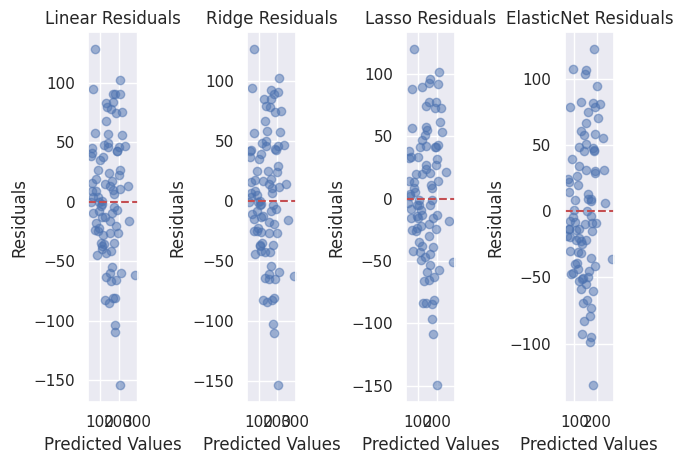

In [10]:
for idx, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 4, idx)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{name} Residuals')

plt.tight_layout()
plt.show()

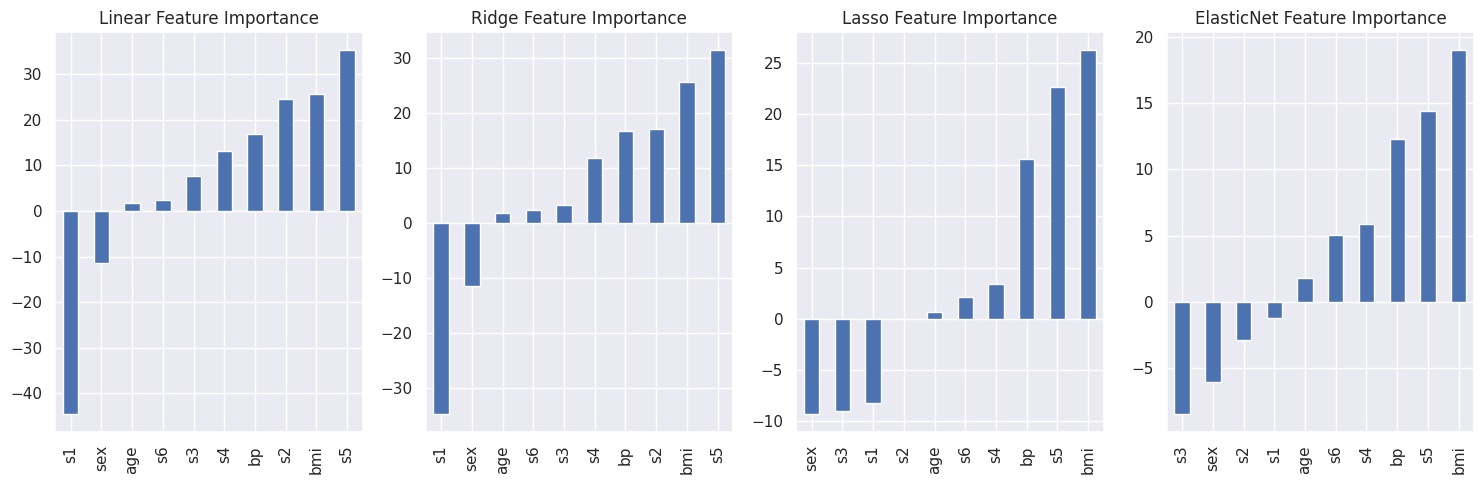

In [11]:
feature_names = diabetes.feature_names

plt.figure(figsize=(15, 5))
for idx, (name, model) in enumerate(models.items(), 1):
    if hasattr(model, 'coef_'):
        plt.subplot(1, 4, idx)
        coef = pd.Series(model.coef_, index=feature_names)
        coef.sort_values().plot(kind='bar')
        plt.title(f'{name} Feature Importance')
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()